In [19]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
%matplotlib inline
#import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
#from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
#import scipy.stats as scs

#from itertools import product                    # some useful functions
from tqdm import notebook

In [20]:
df = pd.read_csv('Desktop/Temp2.csv',skiprows=0)

In [3]:
df.columns=['Y','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','','','','','','','Year1','Real','Year','','','','','','','',]
df.head()


,Y,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,...,Year1,Real,Year,,,,,,,
0,1901.0,13.58,14.72,17.91,20.93,23.18,24.05,23.82,23.58,22.09,...,1901.000000,13.58,1901-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1902.0,13.08,14.20,18.44,21.30,23.63,23.97,23.68,23.34,22.11,...,1901.083333,14.72,1901-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1903.0,13.20,14.55,17.12,20.67,22.95,23.85,23.53,23.29,22.84,...,1901.166667,17.91,1901-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1904.0,13.04,14.07,17.70,21.42,23.02,23.64,23.35,23.03,21.65,...,1901.250000,20.93,1901-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1905.0,12.83,12.74,16.88,19.62,23.32,24.13,23.93,24.31,22.47,...,1901.333333,23.18,1901-05-31,NaN,NaN,NaN,NaN,NaN,1901.0,13.0


In [5]:
df_ = df[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
df_ = df_.dropna()
df_

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,13.58,14.72,17.91,20.93,23.18,24.05,23.82,23.58,22.09,20.20,16.16,13.41
1,13.08,14.20,18.44,21.30,23.63,23.97,23.68,23.34,22.11,19.63,16.35,13.53
2,13.20,14.55,17.12,20.67,22.95,23.85,23.53,23.29,22.84,20.12,15.84,12.93
3,13.04,14.07,17.70,21.42,23.02,23.64,23.35,23.03,21.65,19.50,15.77,14.06
4,12.83,12.74,16.88,19.62,23.32,24.13,23.93,24.31,22.47,21.65,16.63,13.59
...,...,...,...,...,...,...,...,...,...,...,...,...
112,13.22,15.54,18.45,21.29,23.68,24.08,23.94,23.70,22.70,21.69,16.52,14.01
113,13.79,14.72,17.73,21.07,23.16,24.68,24.37,23.58,22.57,20.51,17.07,14.02
114,13.51,15.55,17.99,21.18,23.54,23.82,24.28,23.82,22.52,20.68,17.81,14.75
115,14.91,17.44,20.59,23.75,25.10,25.36,24.72,24.56,23.78,21.65,17.68,15.78


In [6]:
df_.isna().sum()

Jan    0
Feb    0
Mar    0
Apr    0
May    0
Jun    0
Jul    0
Aug    0
Sep    0
Oct    0
Nov    0
Dec    0
dtype: int64

In [7]:
df_.count()

Jan    117
Feb    117
Mar    117
Apr    117
May    117
Jun    117
Jul    117
Aug    117
Sep    117
Oct    117
Nov    117
Dec    117
dtype: int64

In [14]:
import datetime
start = datetime.datetime.strptime("1901-01-01",
"%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in
range(0,117*12)] #indexing by month+year
df2 = pd.DataFrame(date_list,columns = ['TIME'])
df2

,TIME
0,1901-01-01
1,1901-02-01
2,1901-03-01
3,1901-04-01
4,1901-05-01
...,...
1399,2017-08-01
1400,2017-09-01
1401,2017-10-01
1402,2017-11-01


In [16]:
#need to fill up the column wise data from df_ in the temp col of df2
temp = np.array([])
for row in df_[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']].to_numpy():
    #print(row)
    temp = np.append (temp, row)
    
len(temp)
#np.isnan(temp)

1404

In [21]:
df2["TEMP"] = temp
df2

,TIME,TEMP
0,1901-01-01,13.58
1,1901-02-01,14.72
2,1901-03-01,17.91
3,1901-04-01,20.93
4,1901-05-01,23.18
...,...,...
1399,2017-08-01,24.52
1400,2017-09-01,24.01
1401,2017-10-01,22.19
1402,2017-11-01,18.25


In [22]:
data = df2.set_index('TIME')
data

,TEMP
TIME,
1901-01-01,13.58
1901-02-01,14.72
1901-03-01,17.91
1901-04-01,20.93
1901-05-01,23.18
...,...
2017-08-01,24.52
2017-09-01,24.01
2017-10-01,22.19


In [23]:
data.isna().sum() 

TEMP    0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1404 entries, 1901-01-01 to 2017-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEMP    1404 non-null   float64
dtypes: float64(1)
memory usage: 21.9 KB


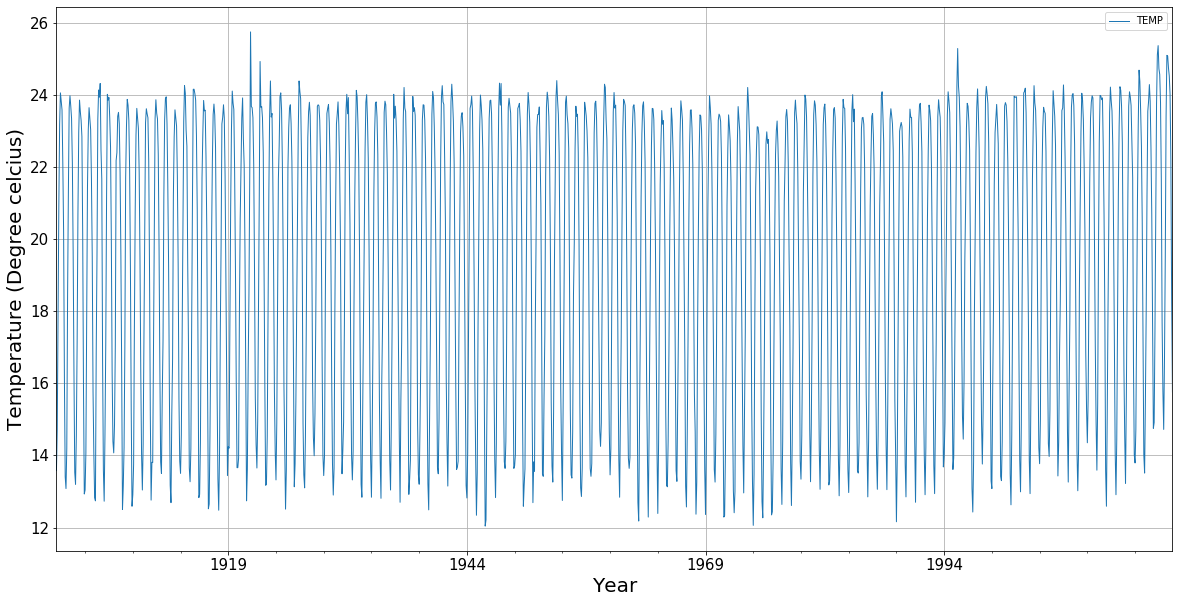

In [26]:
############ Visualising Timeseries ##############################

data['TEMP'].plot(figsize=(20,10), linewidth=1, fontsize=15,legend=True)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Temperature (Degree celcius)', fontsize=20);
plt.grid(True)

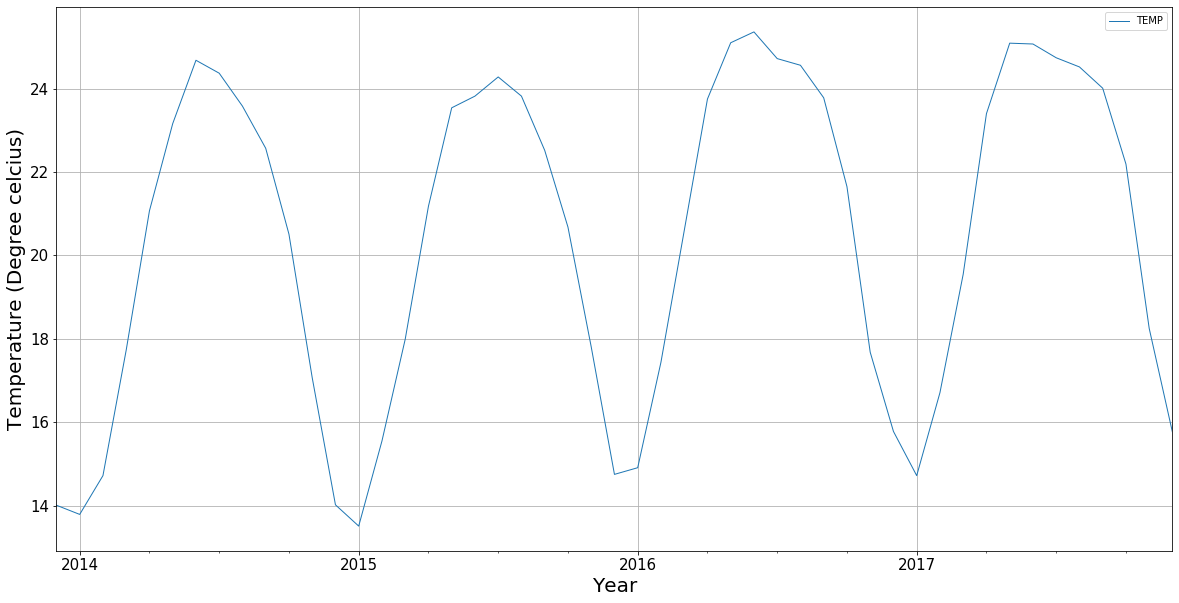

In [27]:
########### Visualizing time series with 4 year window ####################

data.iloc[-49:,0].plot(figsize=(20,10), linewidth=1, fontsize=15,legend=True)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Temperature (Degree celcius)', fontsize=20);
plt.grid(True)

#we can clearly see a seasonal component of period s = 12

In [29]:
#############Augmented Dickey-Fuller Test (ADF Test)/unit root test#################

from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")
        


In [30]:
adf_test(data["TEMP"]) # running (ADF Test) on the complete dataset 


Test Statistic            -1.529018
p-value                    0.519111
# Lags                    23.000000
# Observations          1380.000000
Critical Value (1%)       -3.435097
Critical Value (5%)       -2.863637
Critical Value (10%)      -2.567886
dtype: float64
 Series is Non-Stationary


In [31]:
##############seasonal differencing ################

data['TEMP_diff']=data['TEMP']-data['TEMP'].shift(12)  

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1404 entries, 1901-01-01 to 2017-12-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TEMP       1404 non-null   float64
 1   TEMP_diff  1392 non-null   float64
dtypes: float64(2)
memory usage: 32.9 KB


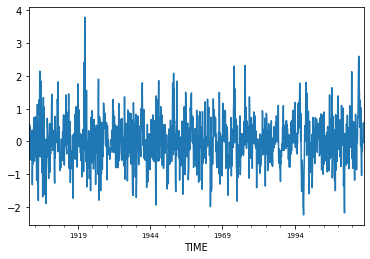

In [32]:
########### Visualising seasonal differenced time series data ######

data["TEMP_diff"].dropna().plot(legend=False)
plt.tick_params(axis='x', which='major', labelsize=7)

In [33]:
adf_test(data["TEMP_diff"].dropna()) # running (ADF Test) on the seasonal differenced dataset 

Test Statistic         -1.040481e+01
p-value                 1.868726e-18
# Lags                  2.400000e+01
# Observations          1.367000e+03
Critical Value (1%)    -3.435143e+00
Critical Value (5%)    -2.863657e+00
Critical Value (10%)   -2.567897e+00
dtype: float64
 Series is Stationary


In [34]:
########### Decomposition of timeseries############

from statsmodels.tsa.seasonal import seasonal_decompose
series = data["TEMP"]
result = seasonal_decompose(series,freq=12,extrapolate_trend = 1, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

TIME
1901-01-01    19.703333
1901-02-01    19.660833
1901-03-01    19.618333
1901-04-01    19.575833
1901-05-01    19.533333
                ...    
2017-08-01    21.284167
2017-09-01    21.330417
2017-10-01    21.376667
2017-11-01    21.422917
2017-12-01    21.469167
Name: trend, Length: 1404, dtype: float64
TIME
1901-01-01   -6.225798
1901-02-01   -4.736866
1901-03-01   -1.618889
1901-04-01    1.659483
1901-05-01    3.837966
                ...   
2017-08-01    3.986570
2017-09-01    2.827019
2017-10-01    0.331485
2017-11-01   -3.150299
2017-12-01   -5.671567
Name: seasonal, Length: 1404, dtype: float64
TIME
1901-01-01    0.102465
1901-02-01   -0.203967
1901-03-01   -0.089444
1901-04-01   -0.305317
1901-05-01   -0.191300
                ...   
2017-08-01   -0.750737
2017-09-01   -0.147436
2017-10-01    0.481849
2017-11-01   -0.022617
2017-12-01   -0.037599
Name: resid, Length: 1404, dtype: float64
TIME
1901-01-01    13.58
1901-02-01    14.72
1901-03-01    17.91
1901-04-01    20.93
1

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


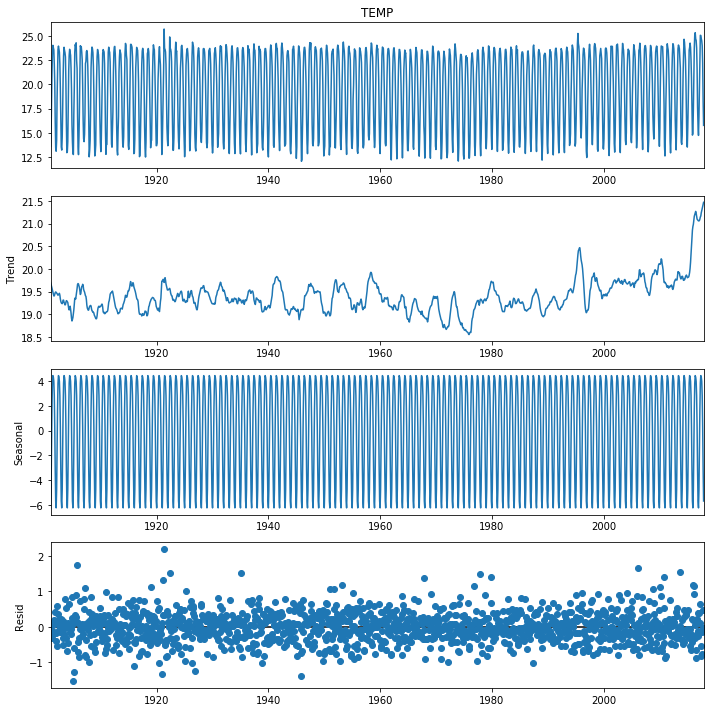

In [35]:
#############Ploting the above decomposition############

from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['TEMP'], model='additive',period=12,extrapolate_trend=1)
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot()
plt.show()

In [36]:
################## Decomposition of seasonal differenced data############

from statsmodels.tsa.seasonal import seasonal_decompose
series = data["TEMP_diff"].dropna()
result = seasonal_decompose(series,freq=12,extrapolate_trend = 1, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

TIME
1902-01-01   -0.377500
1902-02-01   -0.315417
1902-03-01   -0.253333
1902-04-01   -0.191250
1902-05-01   -0.129167
                ...   
2017-08-01   -0.017083
2017-09-01   -0.005833
2017-10-01    0.005417
2017-11-01    0.016667
2017-12-01    0.027917
Name: trend, Length: 1392, dtype: float64
TIME
1902-01-01   -0.001640
1902-02-01    0.005023
1902-03-01    0.001323
1902-04-01    0.007469
1902-05-01    0.001571
                ...   
2017-08-01   -0.008616
2017-09-01    0.000375
2017-10-01    0.001704
2017-11-01    0.002893
2017-12-01    0.005278
Name: seasonal, Length: 1392, dtype: float64
TIME
1902-01-01   -0.120860
1902-02-01   -0.209606
1902-03-01    0.782010
1902-04-01    0.553781
1902-05-01    0.577596
                ...   
2017-08-01   -0.014301
2017-09-01    0.235459
2017-10-01    0.532880
2017-11-01    0.550441
2017-12-01   -0.053194
Name: resid, Length: 1392, dtype: float64
TIME
1902-01-01   -0.50
1902-02-01   -0.52
1902-03-01    0.53
1902-04-01    0.37
1902-05-01    0.

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


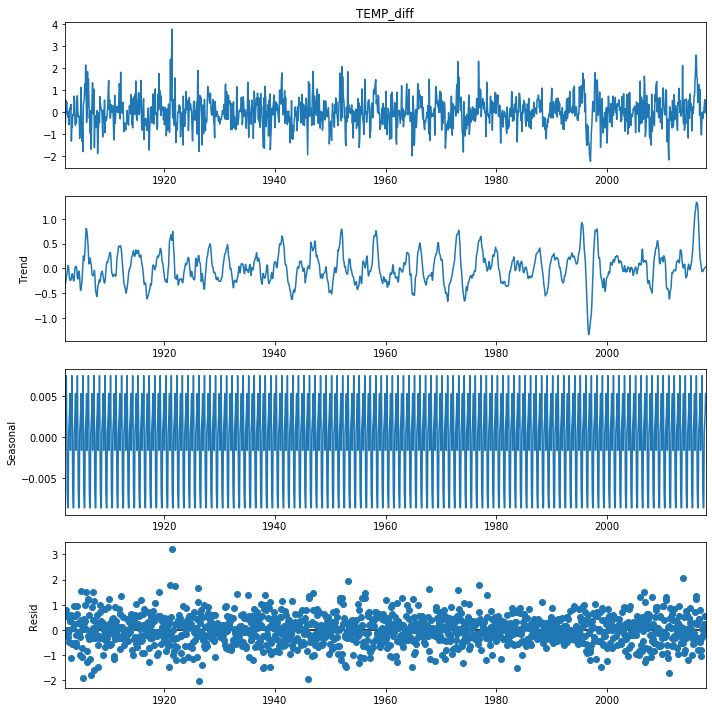

In [37]:
#############Ploting the above decomposition############ 

from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['TEMP_diff'].dropna(), model='additive',period=12,extrapolate_trend=1)
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot()
plt.show()

In [38]:
############## Ploting ACF and PCF of the time series ###############

def tsplot(y, lags=60, figsize=(12, 7), style='bmh'):
    
        #Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        #y - timeseries
        #lags - how many lags to include in ACF, PACF calculation
    
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

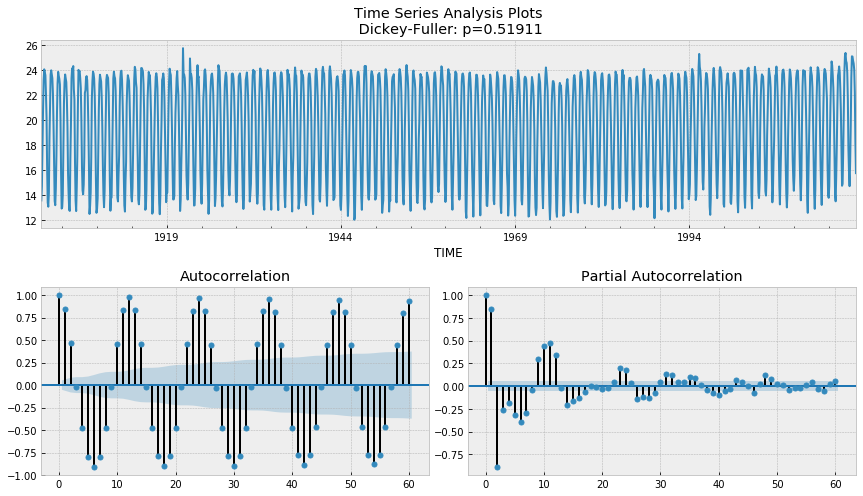

In [39]:
tsplot(data['TEMP']) # ACF and PACF plot of complete dataset

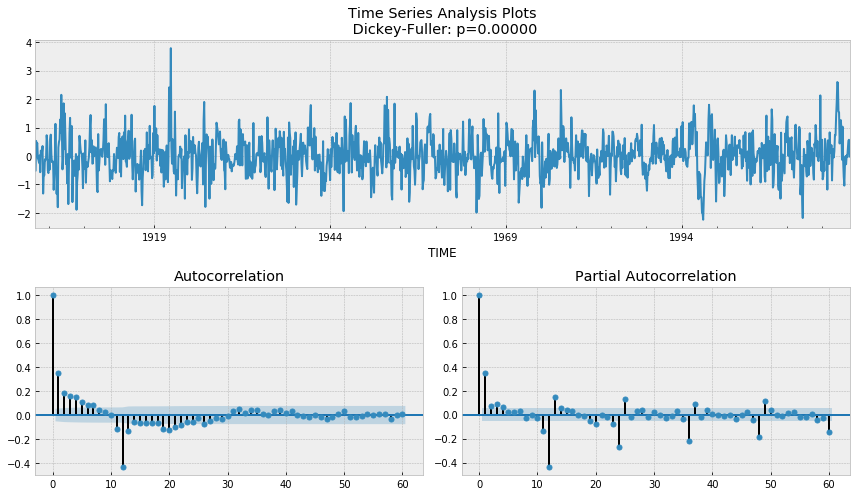

In [40]:
tsplot(data['TEMP_diff'].dropna())  # ACF and PACF plot of seasonally differenced dataset

#Our series now looks like something undescribable, oscillating around zero.
#The Dickey-Fuller test indicates that it is stationary, and the number of significant peaks in ACF has dropped

In [83]:
# setting initial values and some bounds for them
ps = range(0, 4)
d=1 
qs = range(0, 6)
Ps = range(0, 2)  
D=1 
Qs = range(0, 2)  
s = 12            # season length is still 12


#p is most probably between 1 to 5 since it is the last significant lag on the PACF, after which, most others are not significant.
#d equals 1 because we had first differences
#q should be somewhere between 1 to 8 as well,as seen on the ACF
#P might be 1, since 12-th and 24-th lags are somewhat significant on the PACF
#D again equals 1 because we performed seasonal differentiation
#Q is probably 1. The 12-th lag on ACF is significant while the 24-th is not.


# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

96

In [171]:
########### making test and train spilts of dataset #############
test_data = data[-12:] # year 1901 - 2016
train_data = data[:-12] # year 2017
test_data

,TEMP,TEMP_diff
TIME,,
2017-01-01,14.72,-0.19
2017-02-01,16.71,-0.73
2017-03-01,19.55,-1.04
2017-04-01,23.40,-0.35
2017-05-01,25.09,-0.01
2017-06-01,25.07,-0.29
2017-07-01,24.74,0.02
2017-08-01,24.52,-0.04
2017-09-01,24.01,0.23


In [205]:
def optimizeSARIMA(parameters_list, d, D, s):
    
        
        #parameters_list - list with (p, q, P, Q) tuples
        #d - integration order in ARIMA model
        #D - seasonal integration order 
        #s - length of season
    
    results = []
    best_aic = float("inf")

    for param in notebook.tqdm(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(train_data['TEMP'],trend = 'ct',order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    
    # sorting in ascending order of the AIC value
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [206]:
%%time
result_table = optimizeSARIMA(parameters_list, d, D, s)

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\hp\Anac


Wall time: 14min 38s


In [217]:
result_table.head(10)

,parameters,aic
0,"(1, 3, 0, 1)",2213.777669
1,"(0, 3, 0, 1)",2214.350258
2,"(3, 3, 0, 1)",2216.621091
3,"(2, 3, 0, 1)",2217.566770
4,"(2, 2, 0, 1)",2220.026017
5,"(0, 5, 0, 1)",2220.091774
6,"(0, 4, 0, 1)",2221.837319
7,"(0, 2, 0, 1)",2222.731265
8,"(1, 2, 0, 1)",2227.881633
9,"(1, 1, 0, 1)",2252.124259


In [208]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0] 
best_model=sm.tsa.statespace.SARIMAX(train_data['TEMP'],trend = 'ct', order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

#SARIMAX(1, 1, 4)x(0, 1, [1], 12)   without trend on training data 1901-2015    11 percent
#SARIMAX(1, 1, 3)x(0, 1, [1], 12)   with trend on training data 1901-2015    11 percent
#SARIMAX(0, 1, 5)x(0, 1, [1], 12)   with constant trend training data 1901-2016  

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                      SARIMAX Results                                       
Dep. Variable:                                 TEMP   No. Observations:                 1392
Model:             SARIMAX(1, 1, 3)x(0, 1, [1], 12)   Log Likelihood               -1098.889
Date:                              Mon, 30 Nov 2020   AIC                           2213.778
Time:                                      22:24:13   BIC                           2255.611
Sample:                                  01-01-1901   HQIC                          2229.428
                                       - 12-01-2016                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0027      0.008     -0.347      0.728      -0.018       0.013
drift        3.92e-

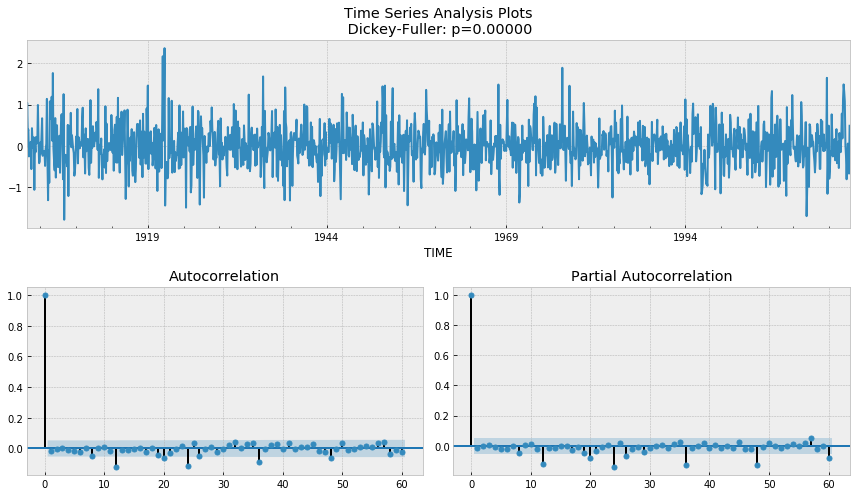

In [209]:
######### residual plot ################# 

tsplot(best_model.resid[12+1:], lags=60)

#It is clear that the residuals are stationary, and there are no apparent autocorrelations

In [210]:
print(best_model.resid[12+1:].describe())


count    1379.000000
mean        0.005716
std         0.506986
min        -1.785263
25%        -0.292002
50%        -0.011565
75%         0.286677
max         2.367367
dtype: float64


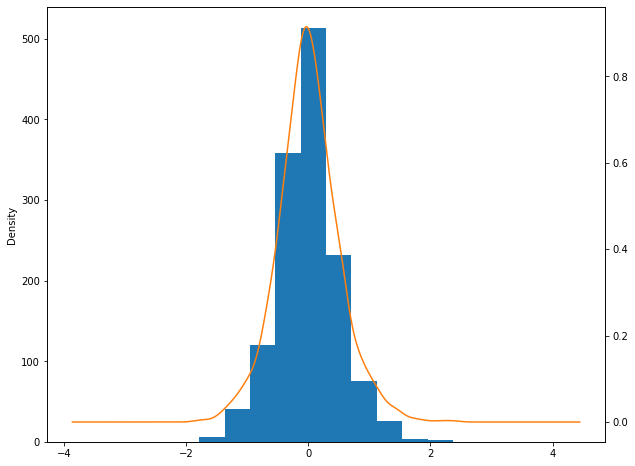

In [211]:
plt.figure(figsize=(10, 8))
# histogram plot
ax = best_model.resid[12+1:].plot(kind='hist')
# density plot
best_model.resid[12+1:].plot(kind='kde', ax=ax, secondary_y=True)


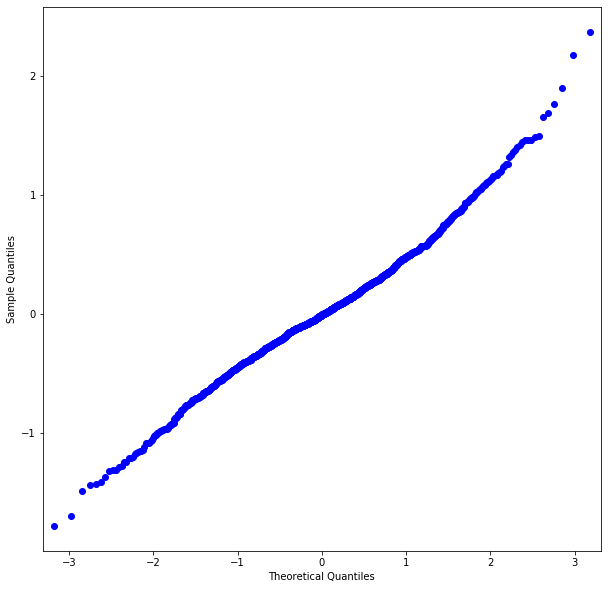

In [212]:
############# Q-Q test for residual analysis

from statsmodels.graphics.gofplots import qqplot
qqplot(best_model.resid[12+1:])
plt.show()

In [213]:
## error measuring functions

from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [218]:
############### PLOTING the Final model and prediction

def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data_ = series.copy()
    
    data_['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data_['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data_.shape[0], end = data_.shape[0]+n_steps)
    forecast = data_.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_error(data_['TEMP'][s+d:], data_['arima_model'][s+d:])
    error_2 = mean_squared_error(data_['TEMP'][s+d:], data_['arima_model'][s+d:])
    error_3 =  mean_absolute_percentage_error(data_['TEMP'][s+d:], data_['arima_model'][s+d:])
    
    plt.figure(figsize=(20, 10))
    plt.title("Mean Absolute Percentage error:{2:.2f}".format(error,error_2,error_3))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data_.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data_.TEMP,alpha= 0.9 ,label="actual")
    plt.legend()
    plt.grid(True);

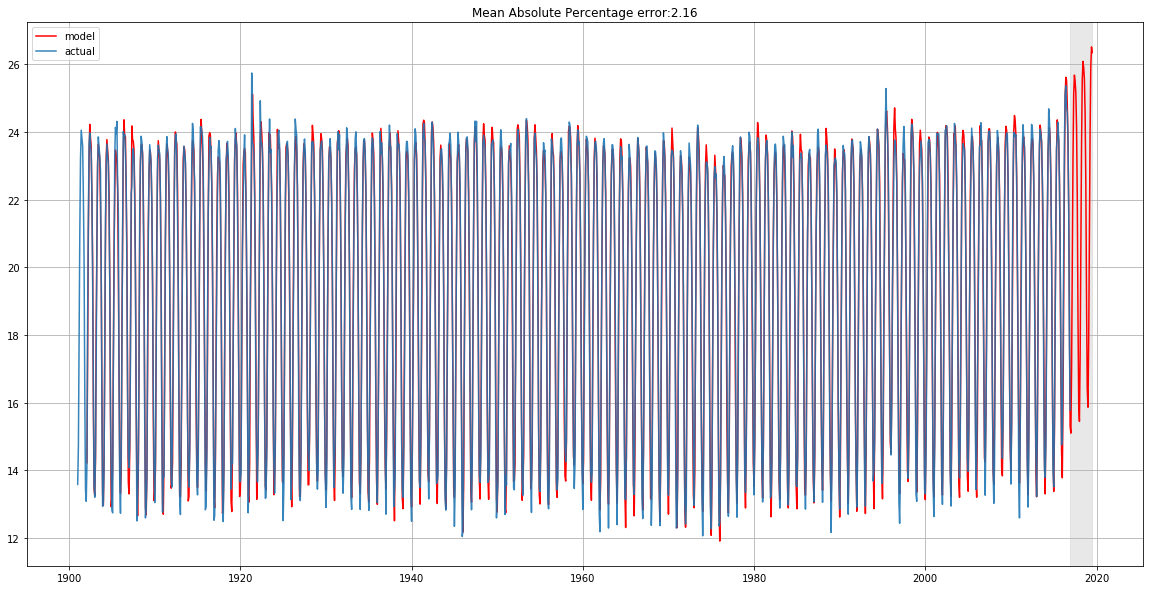

In [219]:
plotSARIMA(train_data, best_model, 30)

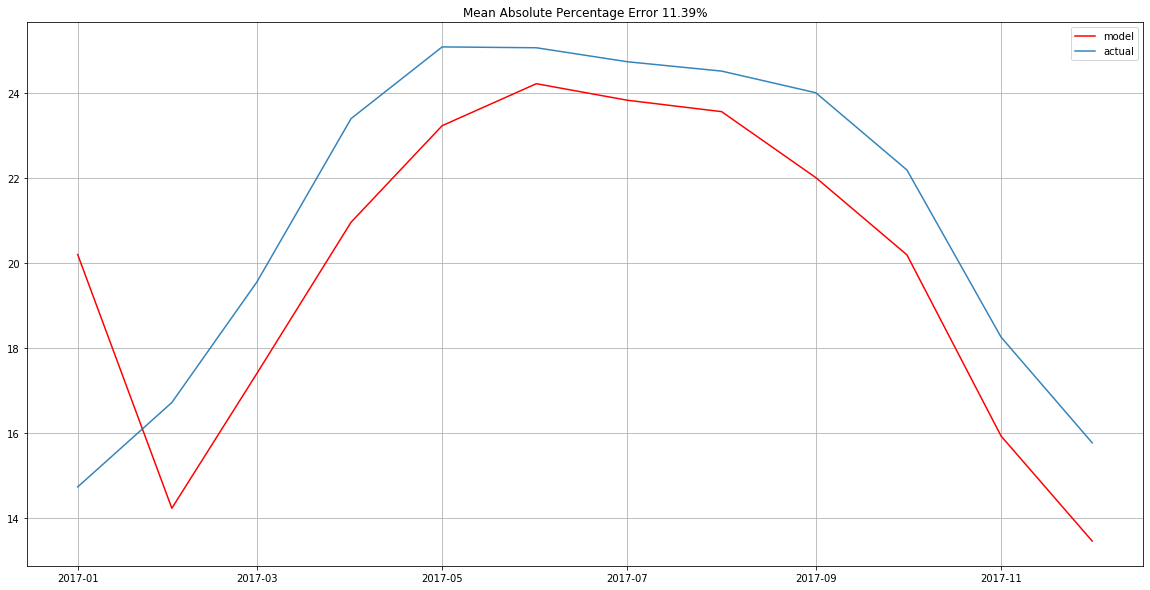

In [220]:
model = best_model
n_steps = 12-1

forecast = model.predict(start = test_data.shape[0], end = test_data.shape[0]+n_steps)
forecast.index = test_data.index 

error = mean_absolute_error(test_data['TEMP'], forecast)
error_2 = mean_squared_error(test_data['TEMP'], forecast)
error_3 = mean_absolute_percentage_error(test_data['TEMP'], forecast)

plt.figure(figsize=(20, 10))
plt.title("Mean Absolute Percentage Error {2:.2f}%".format(error,error_2,error_3))
plt.plot(forecast, color='r', label="model")
plt.plot(test_data['TEMP'],alpha= 0.9 ,label="actual")

plt.legend()
plt.grid(True);

